<a href="https://colab.research.google.com/github/Shahroze-Gondal/Final_Project_kidney_disease_Classification/blob/main/kidney_Classification_Code_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing The Dataset

> Add blockquote



In [ ]:
!pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
chronic_kidney_disease = fetch_ucirepo(id=336)

# data (as pandas dataframes)
X = chronic_kidney_disease.data.features
y = chronic_kidney_disease.data.targets

# metadata
print(chronic_kidney_disease.metadata)

# variable information
print(chronic_kidney_disease.variables)


{'uci_id': 336, 'name': 'Chronic Kidney Disease', 'repository_url': 'https://archive.ics.uci.edu/dataset/336/chronic+kidney+disease', 'data_url': 'https://archive.ics.uci.edu/static/public/336/data.csv', 'abstract': 'This dataset can be used to predict the chronic kidney disease and it can be collected from the hospital nearly 2 months of period.', 'area': 'Other', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 400, 'num_features': 24, 'feature_types': ['Real'], 'demographics': ['Age'], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 2015, 'last_updated': 'Mon Mar 04 2024', 'dataset_doi': '10.24432/C5G020', 'creators': ['L. Rubini', 'P. Soundarapandian', 'P. Eswaran'], 'intro_paper': None, 'additional_info': {'summary': 'We use the following representation to collect the dataset\r\n                        age\t\t-\tage\t\r\n\t\t\tbp\t\t-\tblood pressure\r\n\t\t\tsg\t

# Importing the Required Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Dataset Exploaration

> Add blockquote

> Add blockquote





In [ ]:
# Concatenate features (X) and target (y) into one dataframe
ckd_data = pd.concat([X, y], axis=1)
# Creating a dictionary to map short names to full names
column_names = {
    'age': 'Age',
    'bp': 'Blood Pressure',
    'sg': 'Specific Gravity',
    'al': 'Albumin',
    'su': 'Sugar',
    'rbc': 'Red Blood Cells',
    'pc': 'Pus Cell',
    'pcc': 'Pus Cell Clumps',
    'ba': 'Bacteria',
    'bgr': 'Blood Glucose Random',
    'bu': 'Blood Urea',
    'sc': 'Serum Creatinine',
    'sod': 'Sodium',
    'pot': 'Potassium',
    'hemo': 'Hemoglobin',
    'pcv': 'Packed Cell Volume',
    'wbcc': 'White Blood Cell Count',
    'rbcc': 'Red Blood Cell Count',
    'htn': 'Hypertension',
    'dm': 'Diabetes Mellitus',
    'cad': 'Coronary Artery Disease',
    'appet': 'Appetite',
    'pe': 'Pedal Edema',
    'ane': 'Anemia',
    'class': 'Chronic Kidney Disease'
}

# Renaming columns in the dataframe
ckd_data.rename(columns=column_names, inplace=True)


# Display the combined dataframe
ckd_data.head()

,Age,Blood Pressure,Specific Gravity,Albumin,Sugar,Red Blood Cells,Pus Cell,Pus Cell Clumps,Bacteria,Blood Glucose Random,...,Packed Cell Volume,White Blood Cell Count,Red Blood Cell Count,Hypertension,Diabetes Mellitus,Coronary Artery Disease,Appetite,Pedal Edema,Anemia,Chronic Kidney Disease
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35.0,7300.0,4.6,no,no,no,good,no,no,ckd


In [ ]:
ckd_data.describe()

,Age,Blood Pressure,Specific Gravity,Albumin,Sugar,Blood Glucose Random,Blood Urea,Serum Creatinine,Sodium,Potassium,Hemoglobin,Packed Cell Volume,White Blood Cell Count,Red Blood Cell Count
count,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000,329.000000,294.000000,269.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437,38.884498,8406.122449,4.707435
std,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587,8.990105,2944.474190,1.025323
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000,9.000000,2200.000000,2.100000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000,32.000000,6500.000000,3.900000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000,40.000000,8000.000000,4.800000
75%,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000,45.000000,9800.000000,5.400000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000,54.000000,26400.000000,8.000000


In [ ]:
ckd_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      391 non-null    float64
 1   Blood Pressure           388 non-null    float64
 2   Specific Gravity         353 non-null    float64
 3   Albumin                  354 non-null    float64
 4   Sugar                    351 non-null    float64
 5   Red Blood Cells          248 non-null    object 
 6   Pus Cell                 335 non-null    object 
 7   Pus Cell Clumps          396 non-null    object 
 8   Bacteria                 396 non-null    object 
 9   Blood Glucose Random     356 non-null    float64
 10  Blood Urea               381 non-null    float64
 11  Serum Creatinine         383 non-null    float64
 12  Sodium                   313 non-null    float64
 13  Potassium                312 non-null    float64
 14  Hemoglobin               3

# Categorical Values  Check in Each Columns

<ipython-input-30-7269b5ced08d>:13: UserWarning: Glyph 9 (	) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


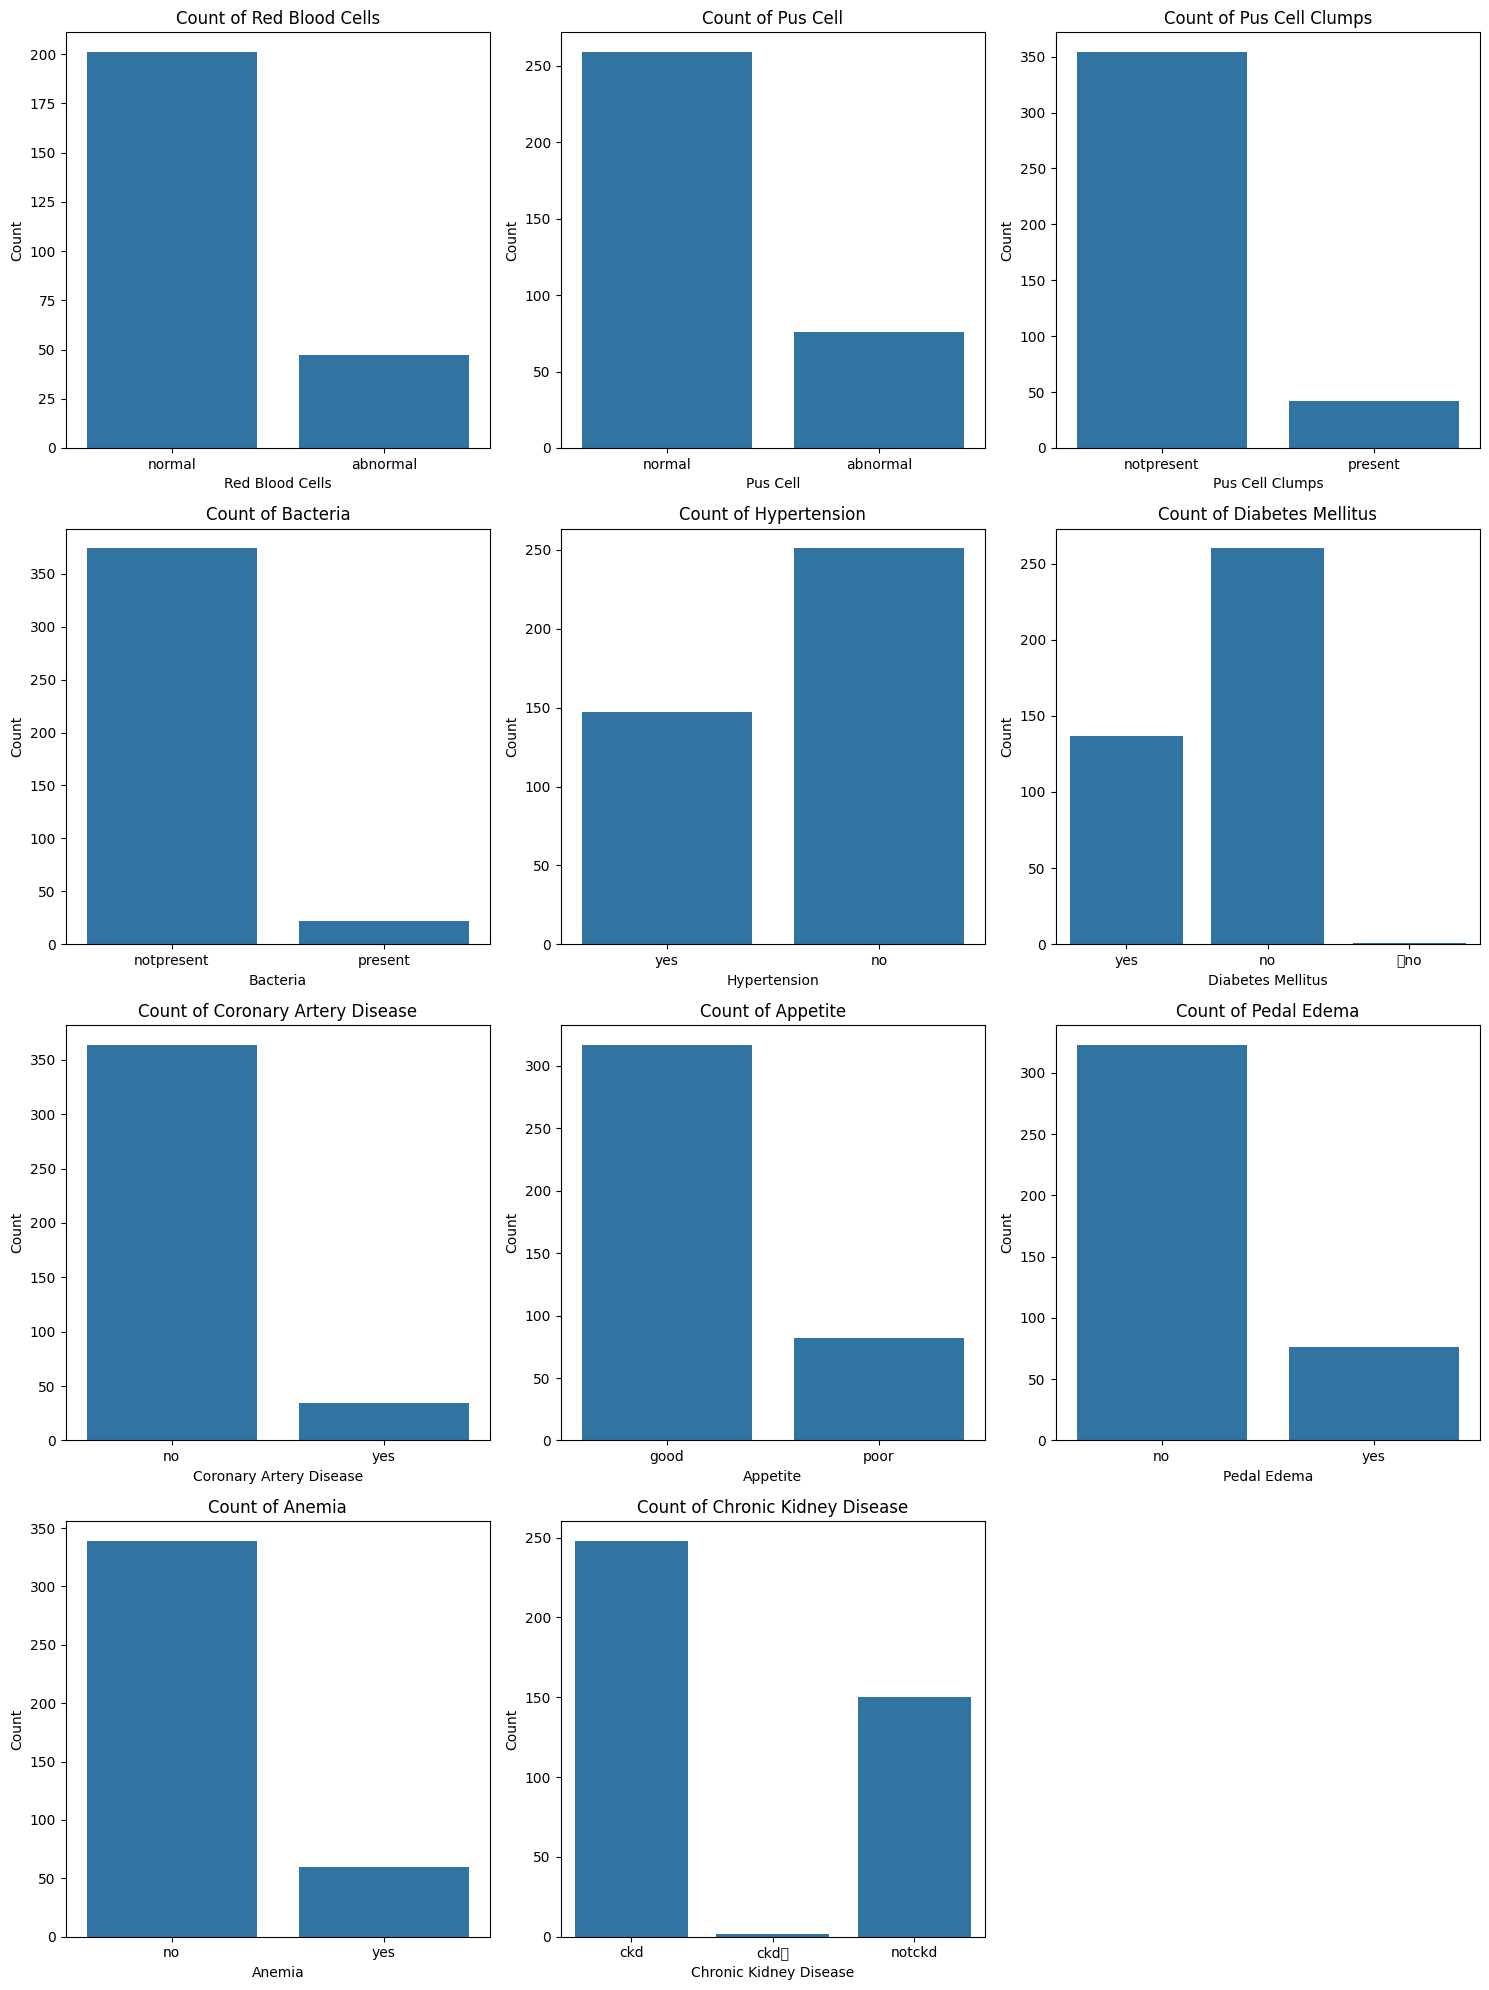

In [ ]:
# Extracting categorical columns
categorical_columns = ckd_data.select_dtypes(include=['object']).columns

# Plotting count distribution for each categorical column
plt.figure(figsize=(15, 20))
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(4, 3, i)  # Adjust grid based on the number of categories
    sns.countplot(data=ckd_data, x=col)
    plt.title(f'Count of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

In [ ]:
# Display count of unique values in column
unique_counts = ckd_data['Chronic Kidney Disease'].value_counts()
print(unique_counts)

Chronic Kidney Disease
ckd       248
notckd    150
ckd\t       2
Name: count, dtype: int64


In [ ]:
# Standardize and convert values to binary, ensuring integer format
ckd_data['Chronic Kidney Disease'] = ckd_data['Chronic Kidney Disease'].str.strip()  # Remove any whitespace or tabs
ckd_data['Chronic Kidney Disease'] = ckd_data['Chronic Kidney Disease'].replace({
    'ckd': 1,
    'ckd\t': 1,   # Treat 'ckd\t' as 1 as well
    'notckd': 0
}).astype(int)    # Explicitly convert to integer

# Verify conversion
print(ckd_data['Chronic Kidney Disease'].unique())


[1 0]


<ipython-input-32-8e61edef04ea>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  ckd_data['Chronic Kidney Disease'] = ckd_data['Chronic Kidney Disease'].replace({


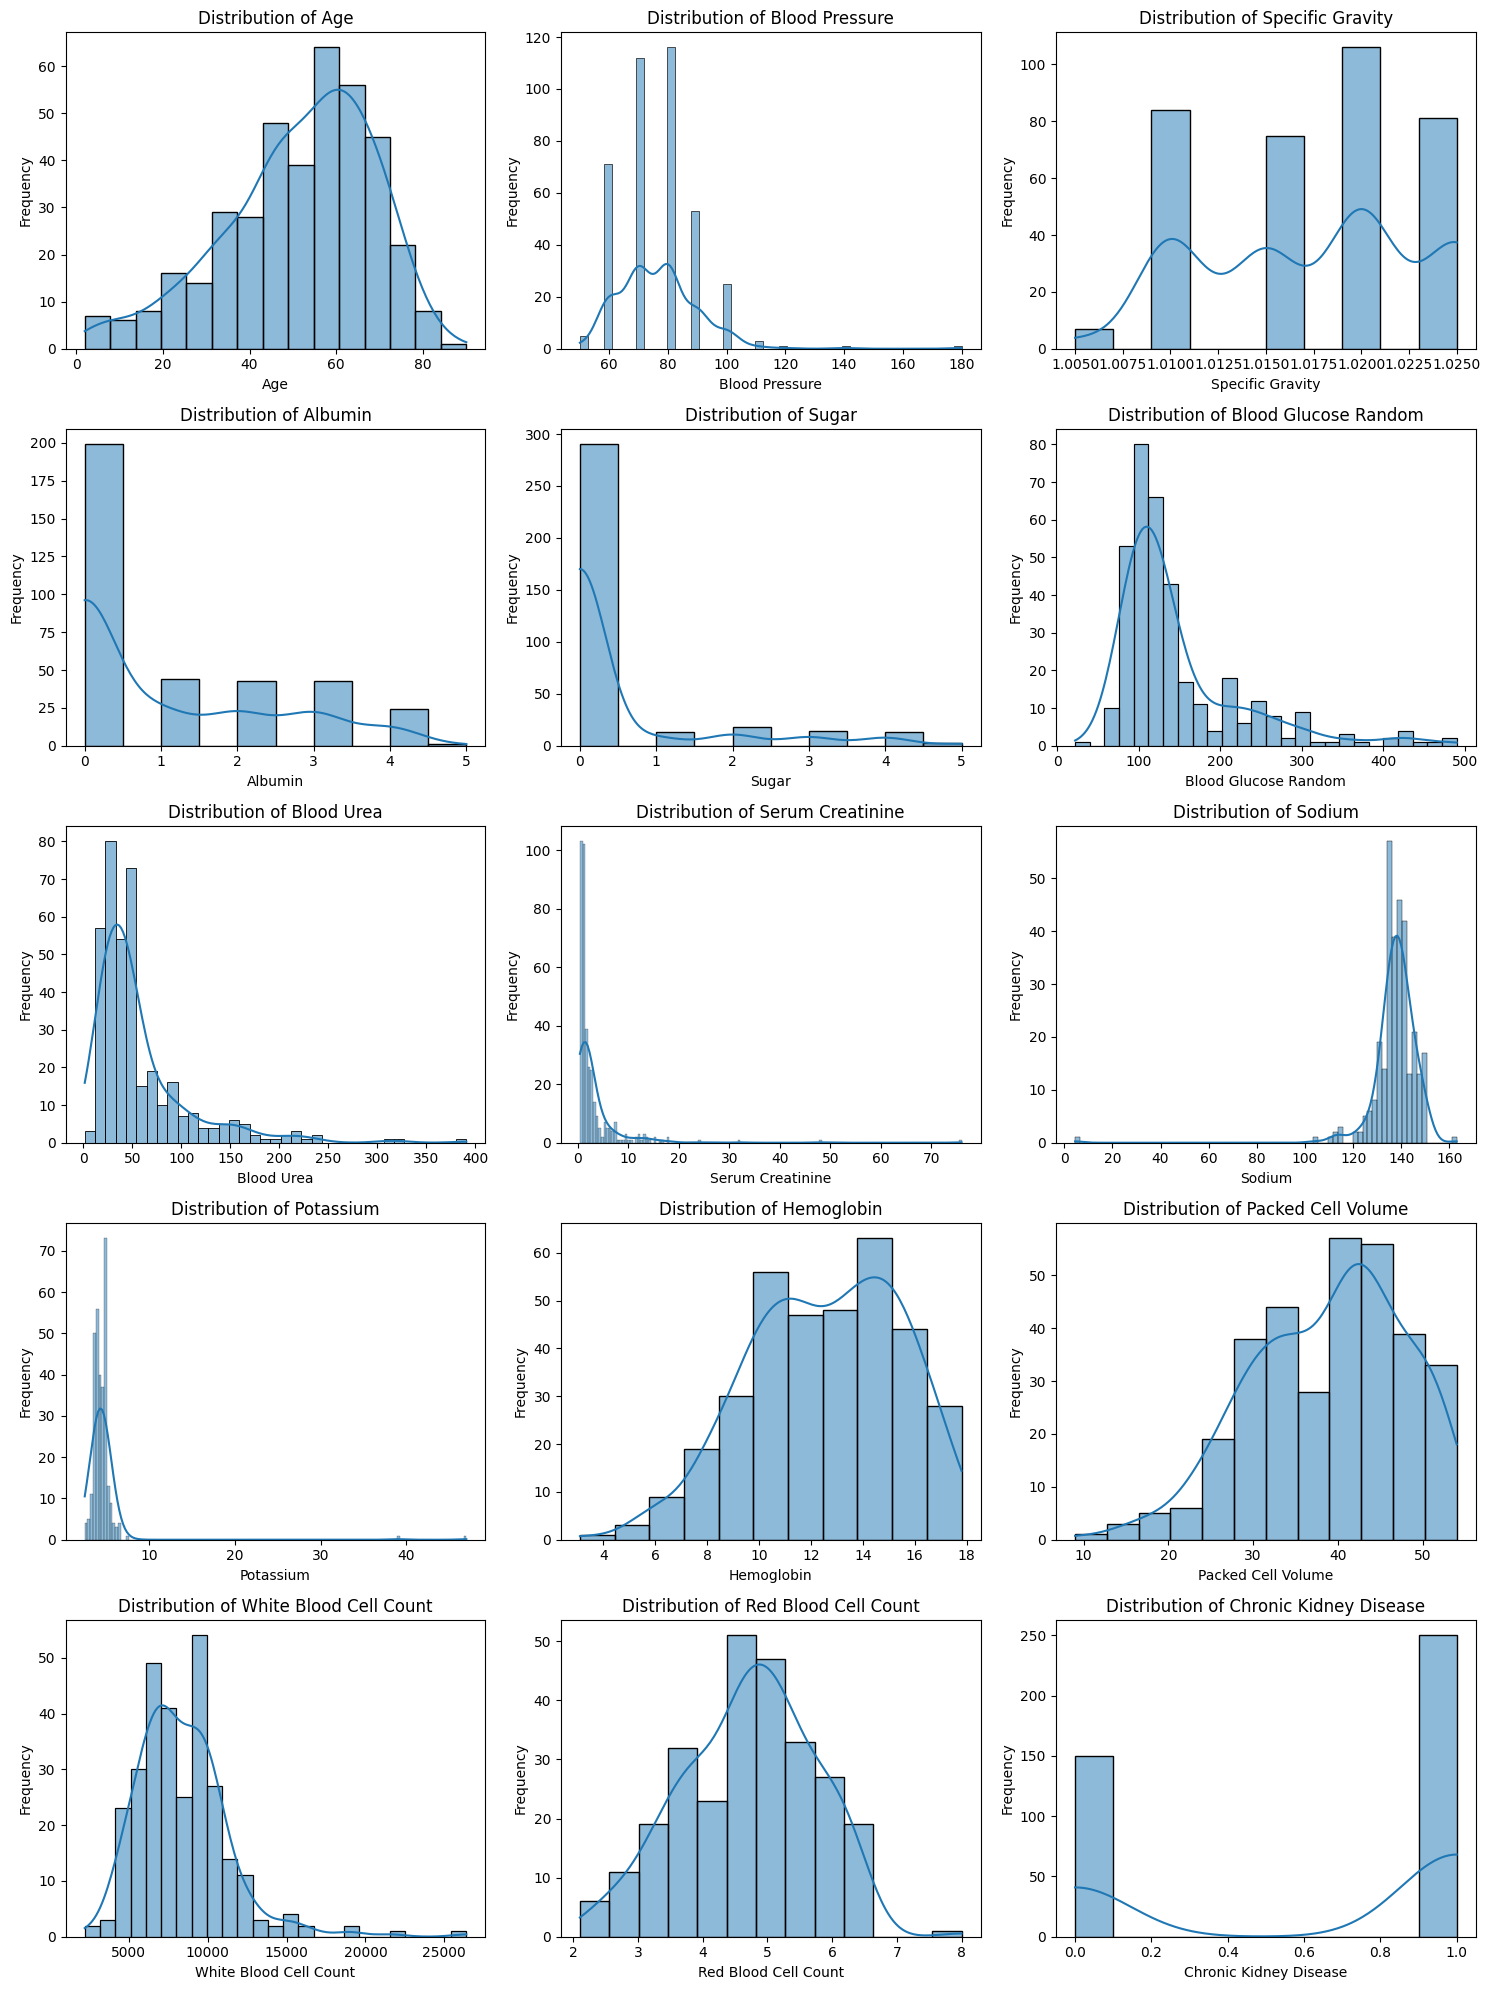

In [ ]:
# Plotting the distribution of each numerical feature
numerical_features = ckd_data.select_dtypes(include='number').columns

# Setting up the plot grid
plt.figure(figsize=(15, 20))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(5, 3, i)
    sns.histplot(ckd_data[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

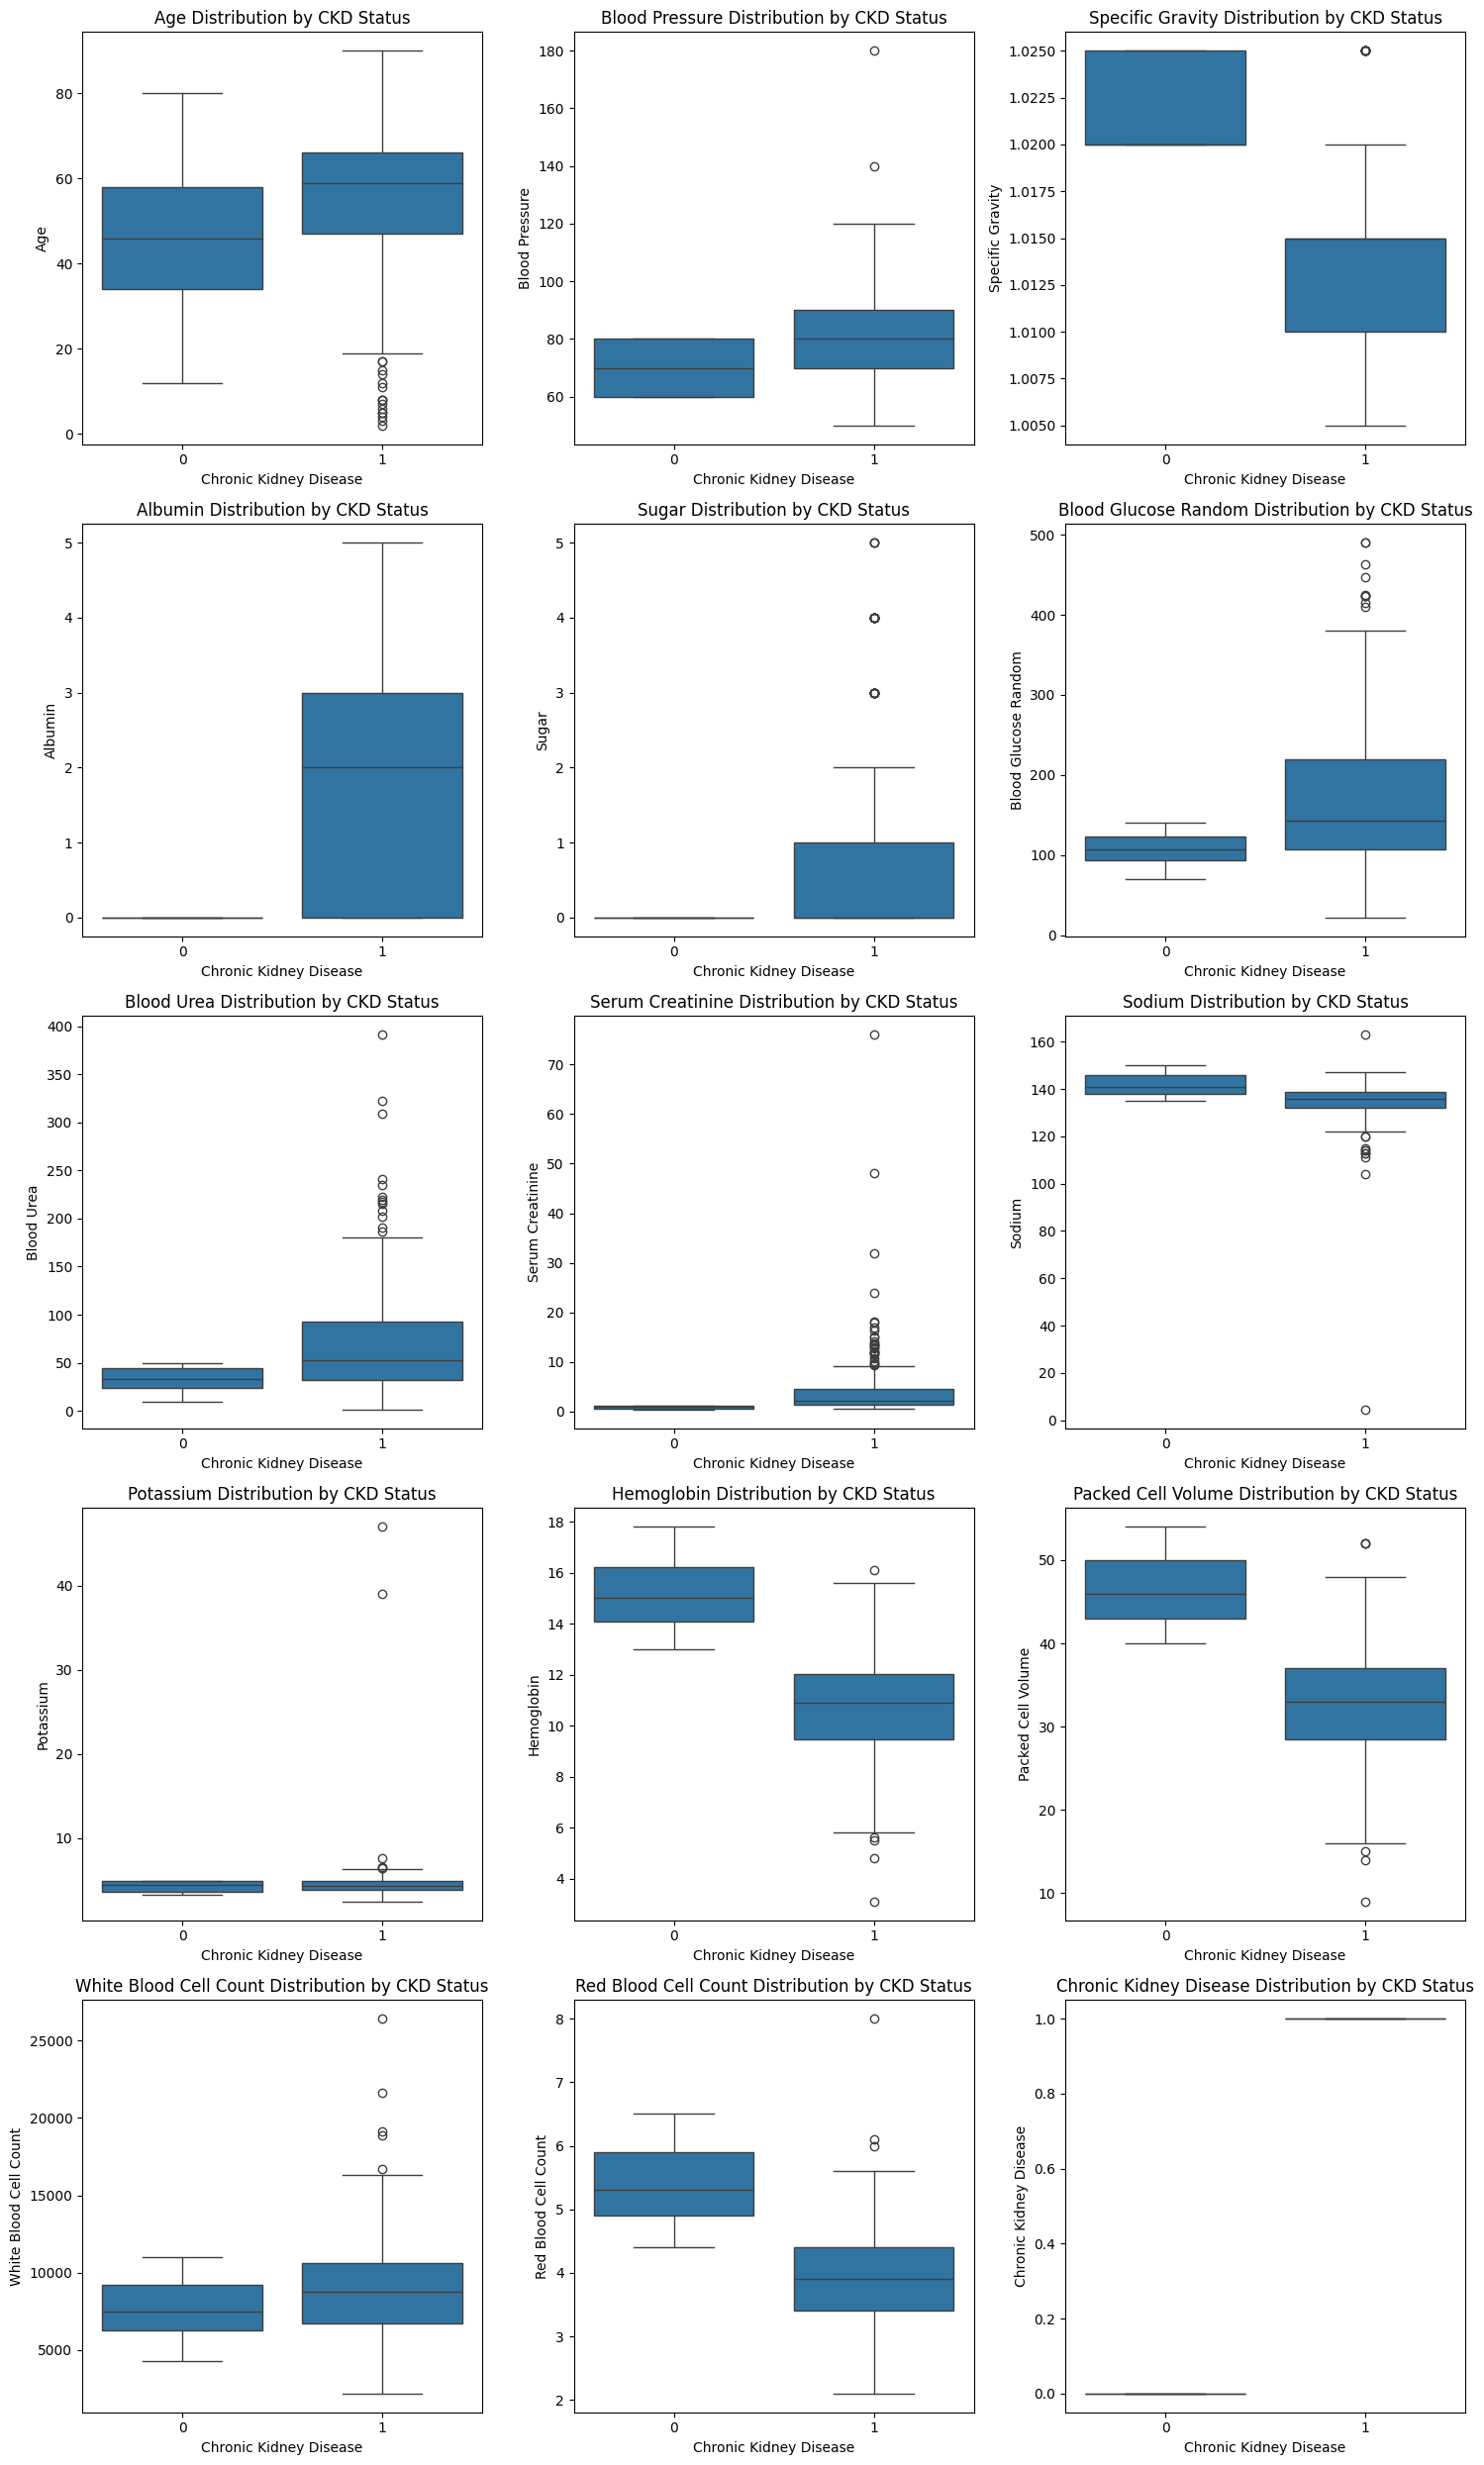

In [ ]:
num_features = len(numerical_features)

# Define the number of columns for the subplot grid
ncols = 3  # Adjust this number based on how many plots per row you want
nrows = math.ceil(num_features / ncols)

# Create subplots
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols * 5, nrows * 5))
axes = axes.flatten()  # Flatten the axes array for easy indexing

# Loop through each numerical feature and create a boxplot in the corresponding subplot
for idx, col in enumerate(numerical_features):
    sns.boxplot(data=ckd_data, x='Chronic Kidney Disease', y=col, ax=axes[idx])
    axes[idx].set_title(f'{col} Distribution by CKD Status')

# Remove any empty subplots if the number of features doesn't fill the grid
for idx in range(num_features, len(axes)):
    fig.delaxes(axes[idx])

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

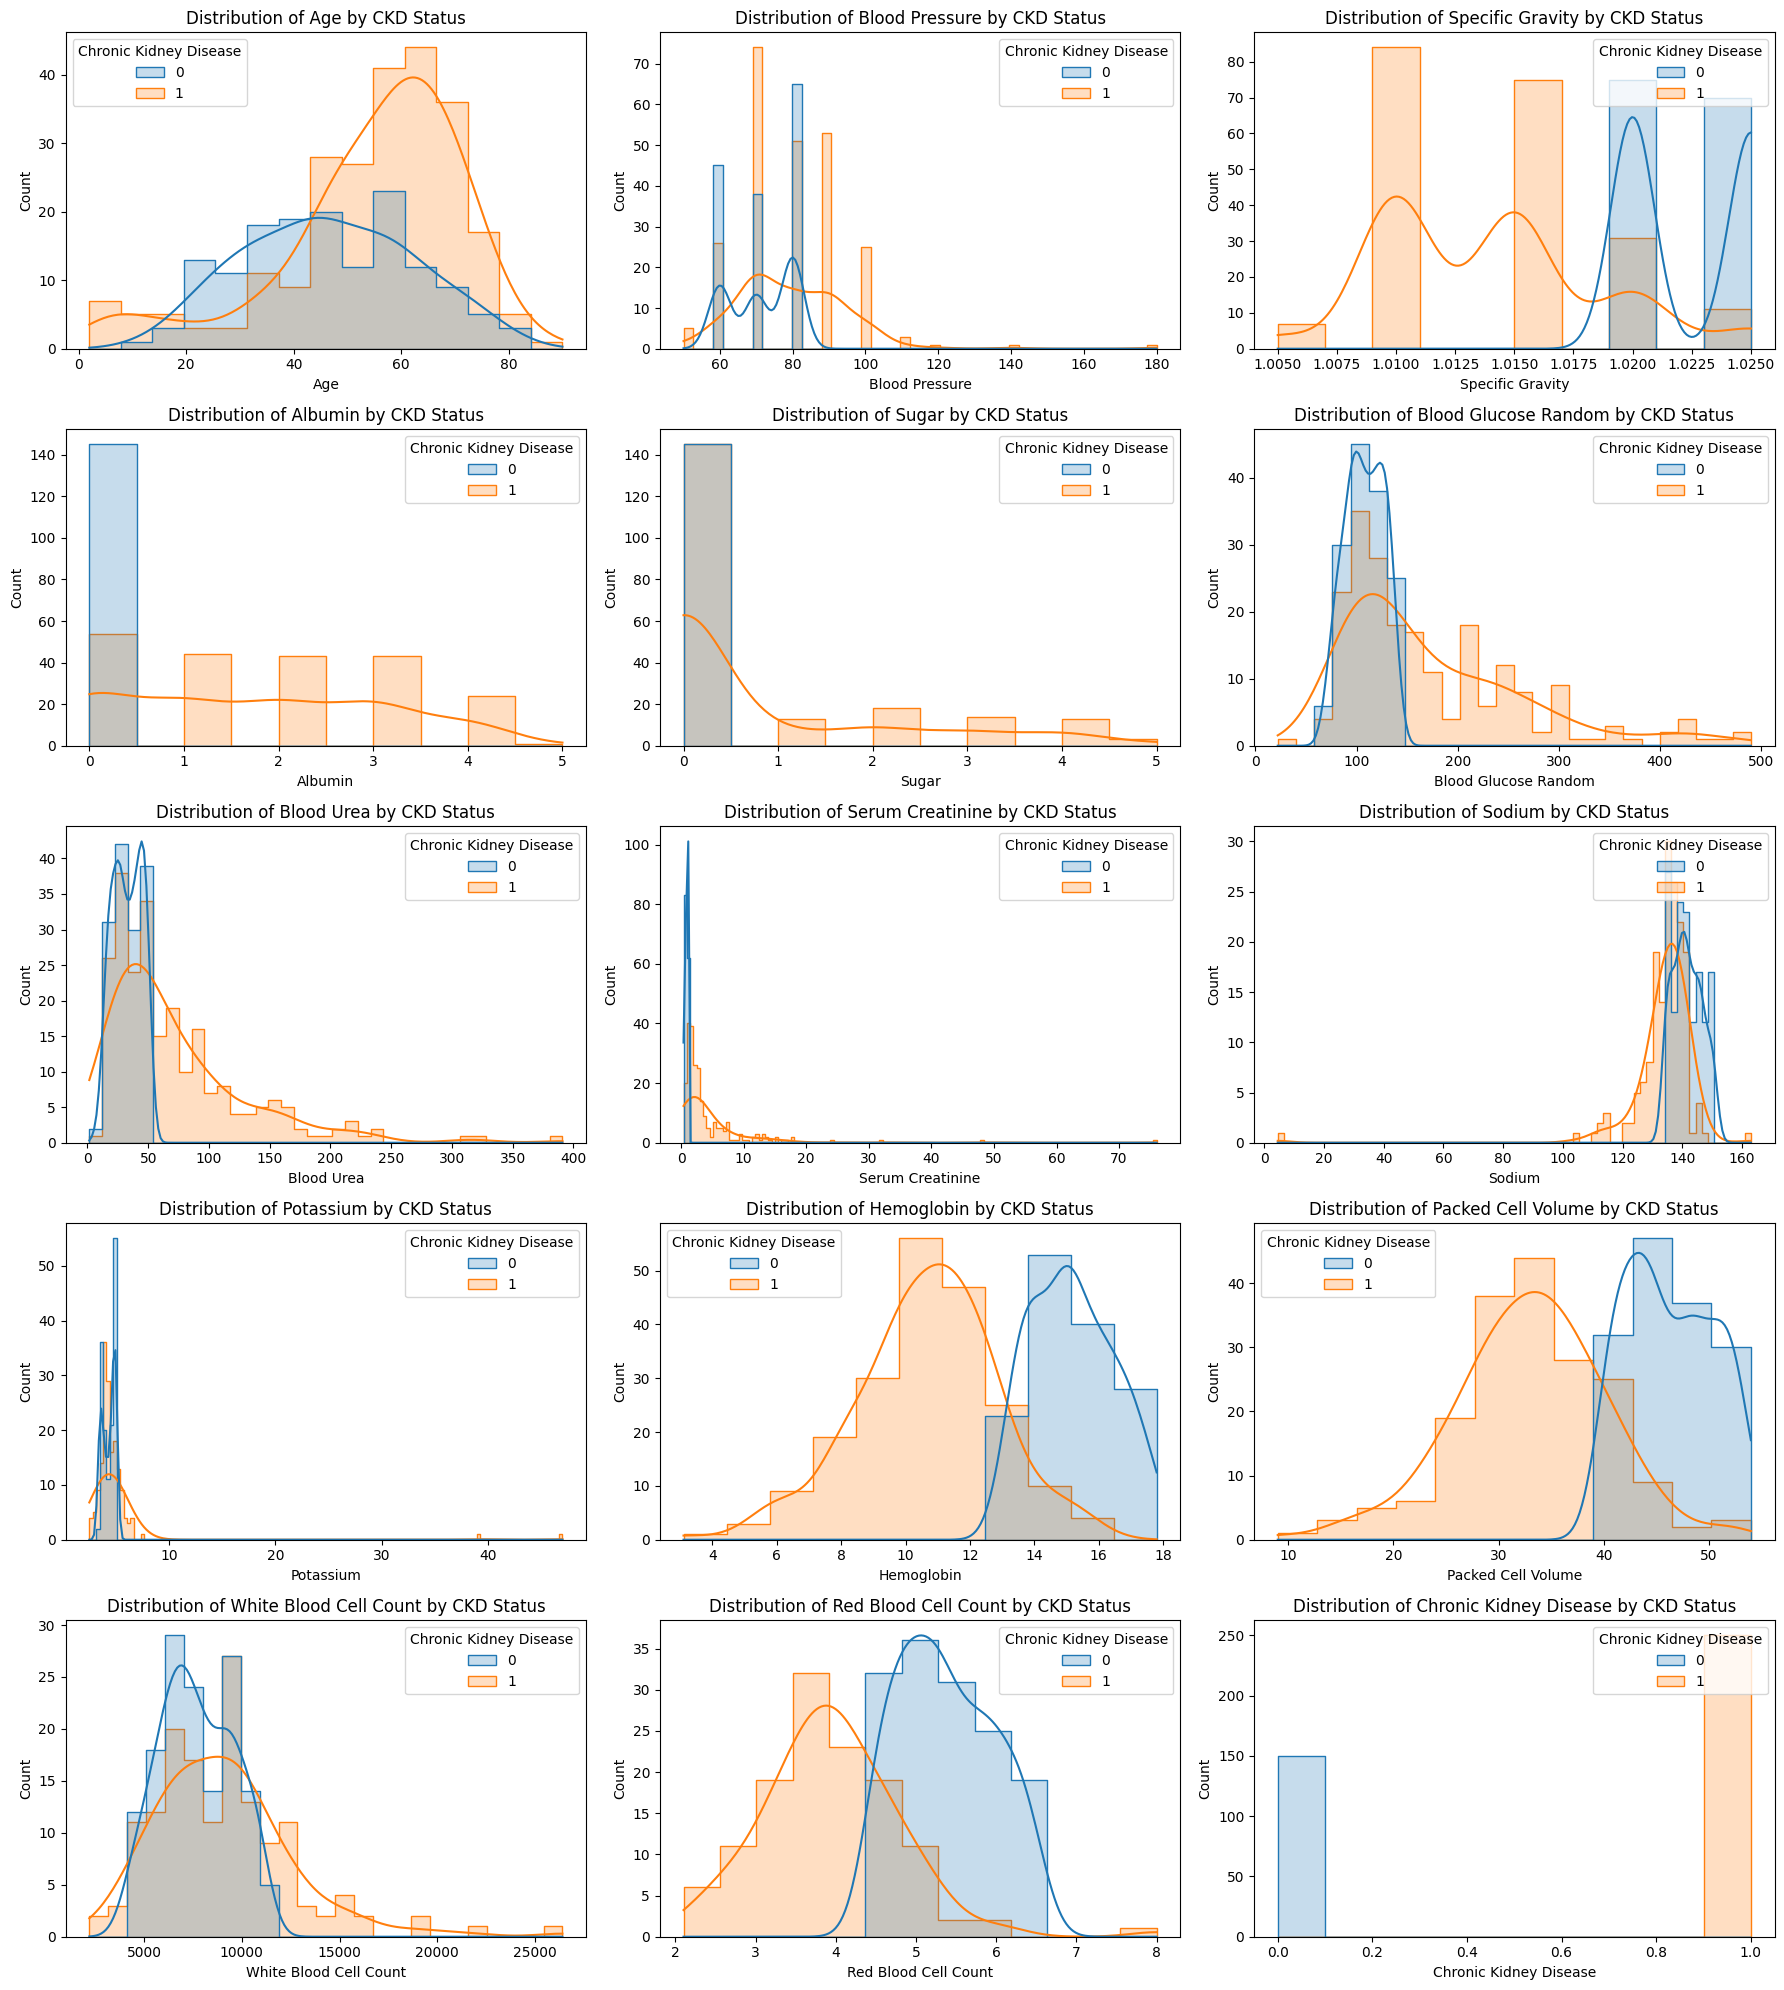

In [ ]:
num_features = len(numerical_features)

# Define the number of columns for the subplot grid
ncols = 3  # Adjust this number based on how many plots per row you want
nrows = math.ceil(num_features / ncols)

# Create subplots
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols * 6, nrows * 4))
axes = axes.flatten()  # Flatten the axes array for easy indexing

# Loop through each numerical feature and create a histogram in the corresponding subplot
for idx, col in enumerate(numerical_features):
    sns.histplot(data=ckd_data, x=col, hue='Chronic Kidney Disease', kde=True, element="step", ax=axes[idx])
    axes[idx].set_title(f'Distribution of {col} by CKD Status')

# Remove any empty subplots if the number of features doesn't fill the grid
if num_features < len(axes):
    for idx in range(num_features, len(axes)):
        fig.delaxes(axes[idx])

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

<ipython-input-47-9613e38399d2>:23: UserWarning: Glyph 9 (	) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


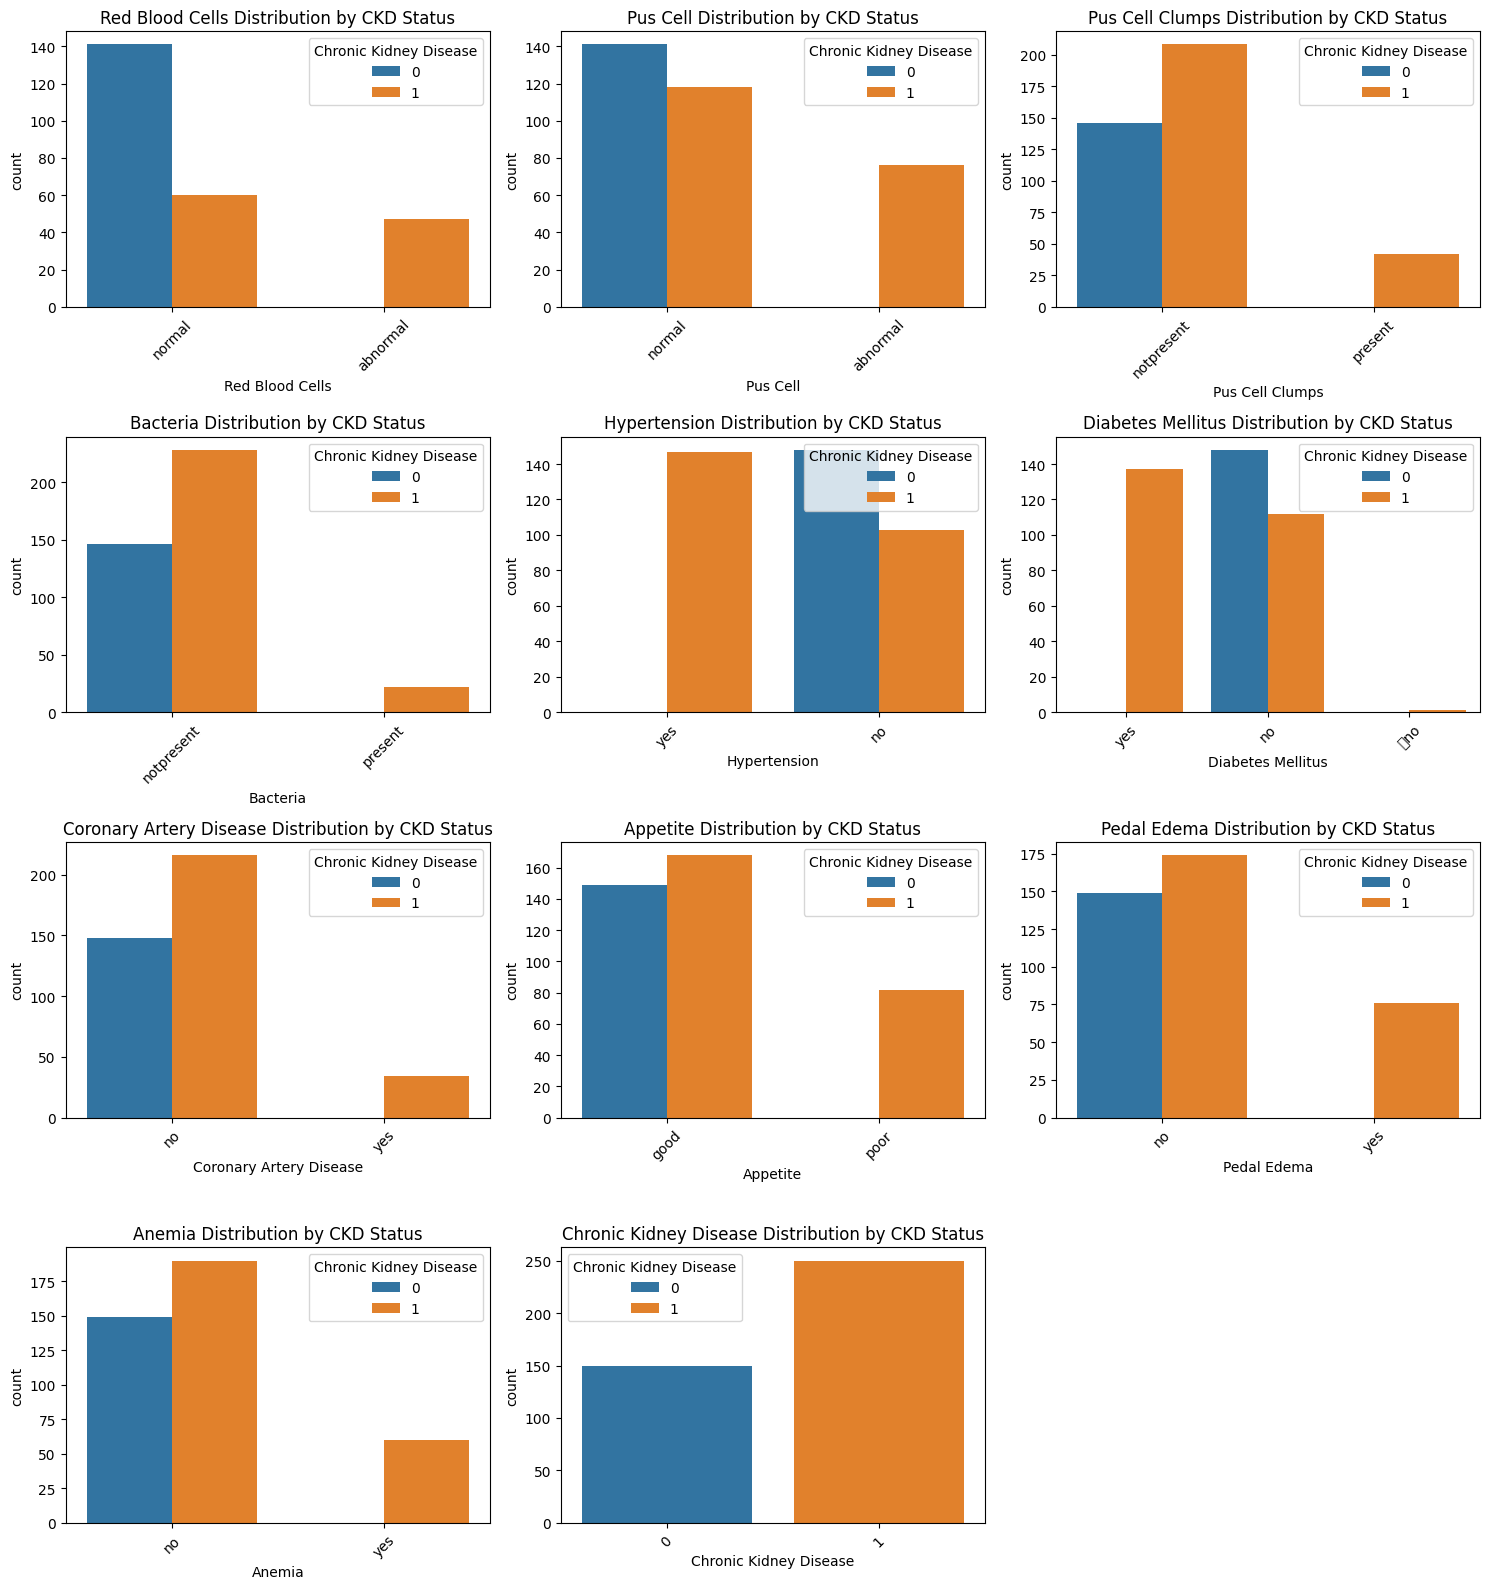

In [ ]:
num_features = len(categorical_columns)

# Define the number of columns for the subplot grid
ncols = 3  # Adjust this number based on your preference
nrows = math.ceil(num_features / ncols)

# Create subplots
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols * 5, nrows * 4))
axes = axes.flatten()  # Flatten the axes array for easy indexing

# Loop through each categorical feature and create a countplot in the corresponding subplot
for idx, col in enumerate(categorical_columns):
    sns.countplot(data=ckd_data, x=col, hue='Chronic Kidney Disease', ax=axes[idx])
    axes[idx].set_title(f'{col} Distribution by CKD Status')
    axes[idx].tick_params(axis='x', rotation=45)  # Rotate x-axis labels if needed

# Remove any empty subplots if the number of features doesn't fill the grid
if num_features < len(axes):
    for idx in range(num_features, len(axes)):
        fig.delaxes(axes[idx])

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

# Missing Values Analysis

In [ ]:
ckd_data.isnull().sum()

,0
Age,9
Blood Pressure,12
Specific Gravity,47
Albumin,46
Sugar,49
Red Blood Cells,152
Pus Cell,65
Pus Cell Clumps,4
Bacteria,4
Blood Glucose Random,44


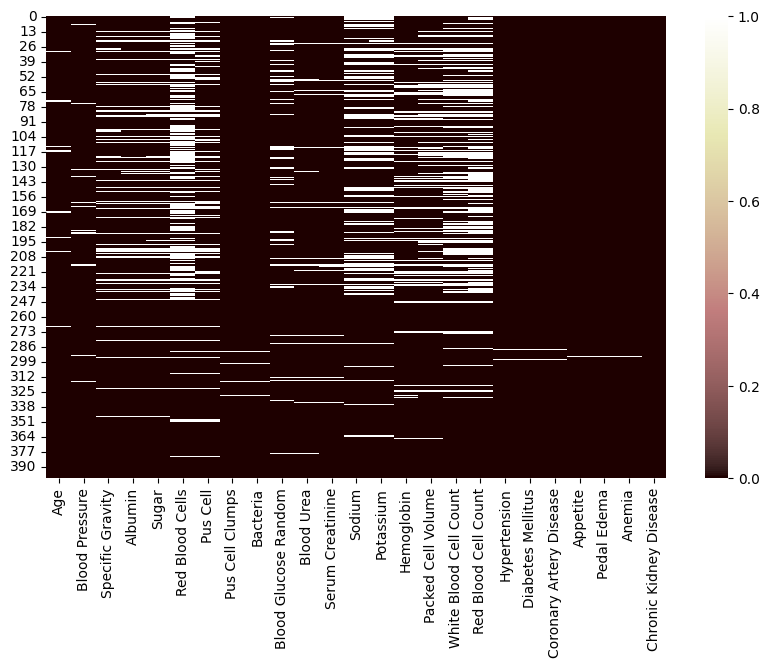

In [ ]:
# Plotting a heatmap to show missing values with a custom color scheme
plt.figure(figsize=(10, 6))
sns.heatmap(ckd_data.isnull(), cmap="pink", cbar=True)
plt.show()